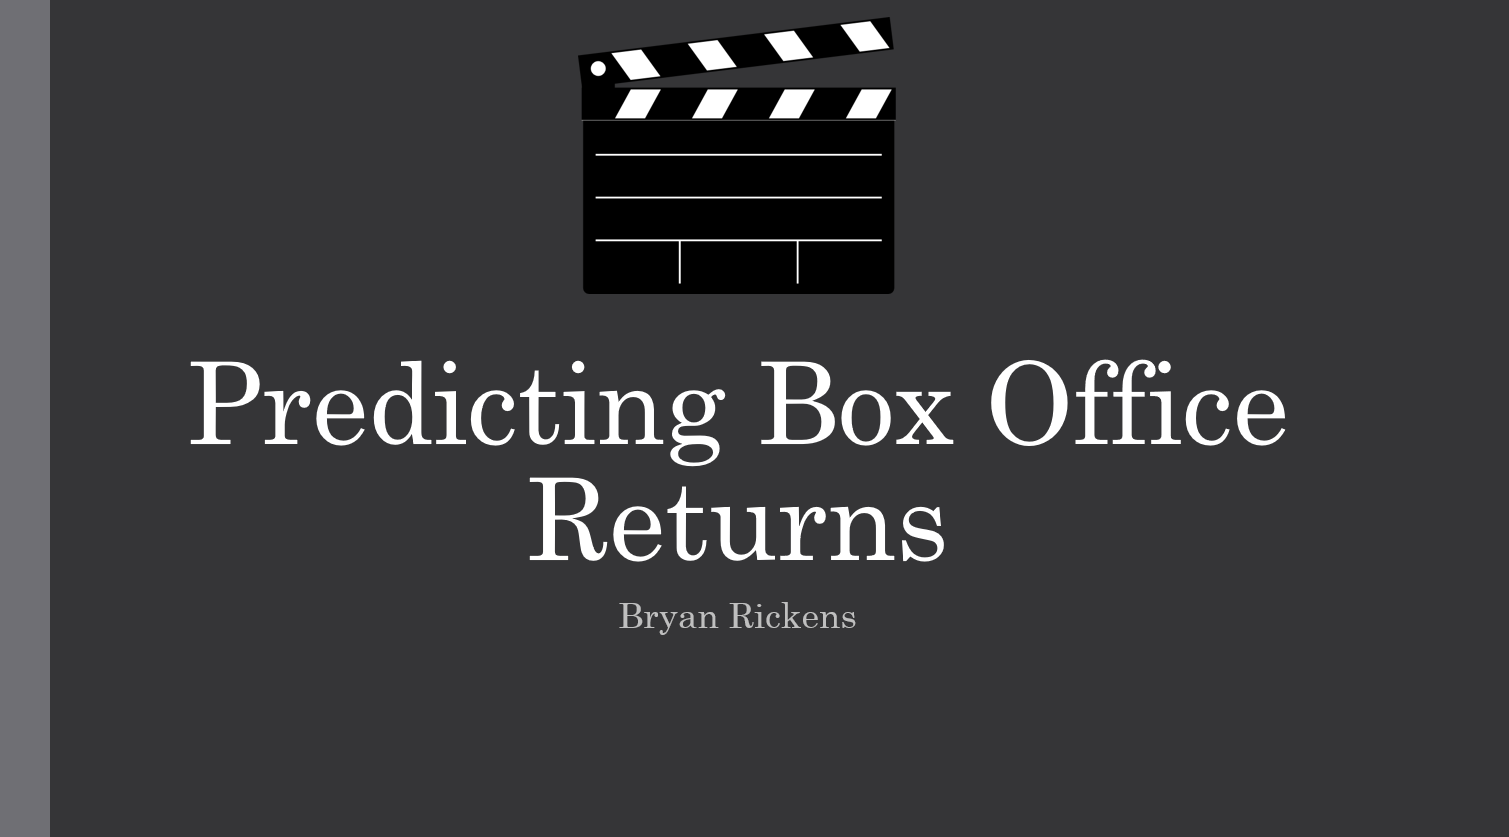

# Table of Contents:
## 1) Data Preprocessing
## 2) Simple Linear Regression
## 3) KNN Regression
## 4) XGBoost
## 5) Ridge Regression

In [1]:
## Import Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

#NOTE: I use the custom Plotly library. Uncomment and pip install below
# %pip install plotly
import plotly.express as px

pd.set_option("display.max_columns", 25)
pd.set_option("display.min_rows", 25)
pd.set_option("display.max_rows", 25)

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)


# 1) Data Preprocessing

# Attributes within Data:

### Opening (Target): Returns on opening weekend
### Budget: Cost to finance the movie
### OpenTheater: How many theaters the movie opened in
### MaxTheater: The maximum number of theaters at once shown in
### Genres: Action, Sci-Fi, Horror, etc.
### MPAA: The rating of the movie (G, PG, PG-13, R)
### ReleaseSeason: Season of the year it was released
### Distributor: The studio that released the movie
### Brand: Any associated "brand" identity the movie has
### Franchise: The collection of sequels/spin-offs a movie belongs to (like the Marvel Cinematic Universe, Star Wars, Jurassic Park, etc.)

In [2]:
# Import the first data set
df0 = pd.read_csv('https://raw.githubusercontent.com/BryanRickens/CSCI-334-Final-Project-Demonstration/main/MovieData.csv')

display(df0)

,Primary Key,Release_URL,Rank,Title,Opening,Gross,OpeningvsGrossPercent,OpenTheater,MaxTheater,OpeningTheaterVsMax,ReleaseSeason,Budget,...,WeekGross7,WeekTheaterNum7,WeekVsMaxTheaterNum7,WeekGross8,WeekTheaterNum8,WeekVsMaxTheaterNum8,WeekGross9,WeekTheaterNum9,WeekVsMaxTheaterNum9,WeekGross10,WeekTheaterNum10,WeekVsMaxTheaterNum10
0,1,https://www.boxofficemojo.com/release/rl305997...,1,Avengers: Endgame,357115007,858373000,0.42,4662,4662,1.00,Spring,356000000.0,...,7408419.0,2121.0,0.46,5634607.0,1450.0,0.31,3172195.0,985.0,0.21,8981672.0,1985.0,0.43
1,2,https://www.boxofficemojo.com/release/rl332192...,2,The Lion King (2019 Live Action),191770759,543638043,0.35,4725,4802,0.98,Summer,260000000.0,...,10684145.0,3190.0,0.66,5524336.0,2610.0,0.54,4582529.0,2365.0,0.49,3402358.0,1978.0,0.41
2,3,https://www.boxofficemojo.com/release/rl330514...,3,Star Wars: Episode IX - The Rise of Skywalker,177383864,515202542,0.34,4406,4406,1.00,Holiday,275000000.0,...,4458457.0,2202.0,0.50,3164885.0,1746.0,0.40,2077009.0,992.0,0.23,762516.0,558.0,0.13
3,4,https://www.boxofficemojo.com/release/rl242421...,4,Frozen II,130263358,477373578,0.27,4440,4440,1.00,Holiday,150000000.0,...,15037678.0,3175.0,0.72,7528648.0,3175.0,0.72,6111878.0,2080.0,0.47,3373802.0,1750.0,0.39
4,5,https://www.boxofficemojo.com/release/rl379850...,5,Toy Story 4,120908065,434038008,0.28,4575,4575,1.00,Summer,200000000.0,...,12277625.0,3225.0,0.70,7083939.0,2295.0,0.50,3240949.0,1245.0,0.27,1842643.0,820.0,0.18
5,6,https://www.boxofficemojo.com/release/rl300964...,6,Captain Marvel,153433423,426829839,0.36,4310,4310,1.00,Spring,160000000.0,...,14602914.0,2653.0,0.62,10962971.0,2435.0,0.57,5472061.0,2243.0,0.52,2452440.0,1504.0,0.35
6,7,https://www.boxofficemojo.com/release/rl379175...,7,Spider-Man: Far from Home,92579212,390532085,0.24,4634,4634,1.00,Summer,160000000.0,...,8202055.0,2678.0,0.58,4194462.0,1515.0,0.33,2383581.0,1008.0,0.22,6430258.0,3162.0,0.68
7,8,https://www.boxofficemojo.com/release/rl324636...,8,Aladdin,91500929,355559216,0.26,4476,4476,1.00,Summer,183000000.0,...,12427104.0,2758.0,0.62,10623994.0,2557.0,0.57,6899872.0,2105.0,0.47,5211006.0,1798.0,0.40
8,9,https://www.boxofficemojo.com/release/rl252151...,9,Joker,96202337,335451311,0.29,4374,4374,1.00,Fall,55000000.0,...,7147220.0,2337.0,0.53,4461334.0,1410.0,0.32,2528476.0,1146.0,0.26,1468751.0,956.0,0.22
9,10,https://www.boxofficemojo.com/release/rl755467...,10,Jumanji: The Next Level,59251543,320314960,0.19,4227,4227,1.00,Holiday,125000000.0,...,9671353.0,3121.0,0.74,7713258.0,2945.0,0.70,7085875.0,2729.0,0.65,7948137.0,2729.0,0.65


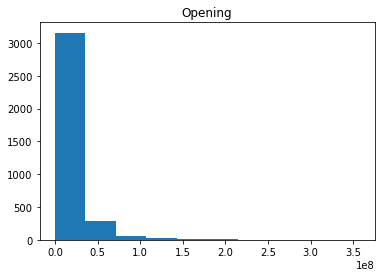

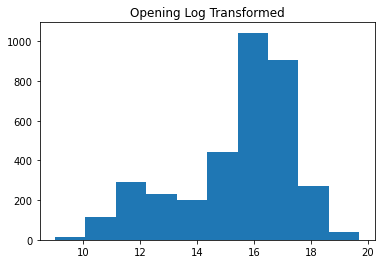

In [3]:
# Assess the normality and skewedness of our outcome -- Opening
X = df0.Opening
fig = plt.hist(X)
plt.title('Opening')
plt.show()

# Since we expect it to be positvely skewed (being a price),
# we apply a log transformation
X1 = np.log1p(X)
fig = plt.hist(X1)
plt.title('Opening Log Transformed')
plt.show()

### We have already ran into an issue: "Opening" (our main predictor) is not normally distributed even with a log transformation. Although it is possible to only create non-parametric models, let's first evaluate the problem at hand.



,Title,OpenTheater,MaxTheater
146,Jay and Silent Bob Reboot,1,788
489,Loving Vincent,1,218
681,Don't Think Twice,1,175
1057,Ode to My Father,1,38
1198,Journey to the South Pacific,1,19
1221,The Great Beauty,1,77
1330,2016: Obama's America,1,2017
2237,Sicko,1,1117
2319,"Lust, Caution",1,143
2660,Downfall,1,174


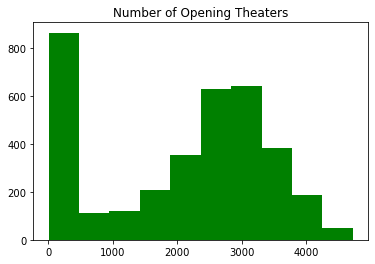

In [4]:
# Check the for movies that open in a small number of theaters
display(df0[['Title','OpenTheater','MaxTheater']].nsmallest(20, "OpenTheater"))

fig = plt.hist(df0['OpenTheater'], color = 'green')
plt.title('Number of Opening Theaters')
plt.show()


### We see that for the number of opening theaters there's an uneven amount of movies opening in a small number of theaters -- and we now realize that most movies show their LIMITED release weekend returns as their offical "Opening" instead of seperating them. This will cause problems for our dataset. We need a uniform dataset showing only WIDE release openings for the best accuracy. 

### Wikipedia defines a limited release as a movie showing in 599 theaters or less. Our goal now is to return to the drawing board, and acquire a dataset showing 1) no movies with less than 600 Max Theaters, and only counting Opening as a week where its TheaterNum is 600 or greater. 

### Below is a new dataset captured correctly identifying only wide release openings.

In [5]:
# Import the new dataset
df = pd.read_csv('https://raw.githubusercontent.com/BryanRickens/CSCI-334-Final-Project-Demonstration/main/MovieDataFinal.csv')

display(df)

,Primary Key,Title,Opening,OpenTheater,MaxTheater,Gross,OpeningvsGrossPercent,OpeningTheaterVsMax,ReleaseSeason,Budget,Distributor,Brand,Franchise,MPAA,Runtime,Genres
0,1,Avengers: Endgame,357115007,4662,4662,858373000,0.416037,1.000000,Spring,356000000.0,Walt Disney Studios Motion Pictures\n \...,Marvel Comics,Marvel Cinematic Universe,PG-13,181,Action\n \n Adventure\n \n Drama\n \n Sci-Fi
1,2,The Lion King (2019 Live Action),191770759,4725,4802,543638043,0.352754,0.983965,Summer,260000000.0,Walt Disney Studios Motion Pictures\n \...,(None),Disney Live Action Reimaginings,PG,118,Adventure\n \n Animation\n \n Drama\n \n Famil...
2,3,Star Wars: Episode IX - The Rise of Skywalker,177383864,4406,4406,515202542,0.344299,1.000000,Holiday,275000000.0,Walt Disney Studios Motion Pictures\n \...,Lucasfilm,Star Wars,PG-13,141,Action\n \n Adventure\n \n Fantasy\n \n Sci-Fi
3,4,Frozen II,130263358,4440,4440,477373578,0.272875,1.000000,Holiday,150000000.0,Walt Disney Studios Motion Pictures\n \...,Walt Disney Animation Studios,Frozen,PG,103,Adventure\n \n Animation\n \n Comedy\n \n Fami...
4,5,Toy Story 4,120908065,4575,4575,434038008,0.278566,1.000000,Summer,200000000.0,Walt Disney Studios Motion Pictures\n \...,Pixar,Toy Story,G,100,Adventure\n \n Animation\n \n Comedy\n \n Fami...
5,6,Captain Marvel,153433423,4310,4310,426829839,0.359472,1.000000,Spring,160000000.0,Walt Disney Studios Motion Pictures\n \...,Marvel Comics,Marvel Cinematic Universe,PG-13,123,Action\n \n Adventure\n \n Sci-Fi
6,7,Spider-Man: Far from Home,92579212,4634,4634,390532085,0.237059,1.000000,Summer,160000000.0,Sony Pictures Entertainment (SPE)\n \n,Marvel Comics,Marvel Cinematic Universe,PG-13,129,Action\n \n Adventure\n \n Sci-Fi
7,8,Aladdin,91500929,4476,4476,355559216,0.257344,1.000000,Summer,183000000.0,Walt Disney Studios Motion Pictures\n \...,(None),Disney Live Action Reimaginings,PG,128,Adventure\n \n Comedy\n \n Family\n \n Fantasy...
8,9,Joker,96202337,4374,4374,335451311,0.286785,1.000000,Fall,55000000.0,Warner Bros.\n \n,DC Comics,(None),R,122,Crime\n \n Drama\n \n Thriller
9,10,Jumanji: The Next Level,59251543,4227,4227,320314960,0.184979,1.000000,Holiday,125000000.0,Sony Pictures Entertainment (SPE)\n \n,(None),Jumanji,PG-13,123,Action\n \n Adventure\n \n Comedy\n \n Fantasy


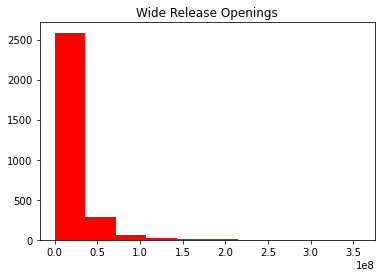

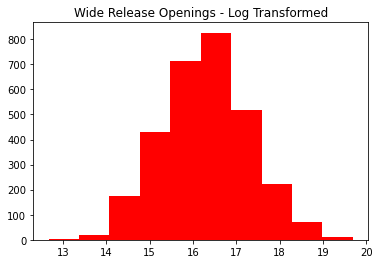

In [6]:
# Assess the normality and skewedness of our outcome -- Opening
X = df.Opening
fig = plt.hist(X, color = 'red')
plt.title('Wide Release Openings')
plt.show()

X1 = np.log1p(X)
plt.title('Wide Release Openings - Log Transformed')
fig = plt.hist(X1, color = 'red')
plt.show()


Empty DataFrame
Columns: [Title, OpenTheater, Opening]
Index: []


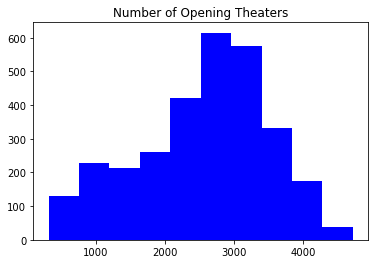

In [7]:
# Check the for movies that open in a small number of theaters
dfOpening = df[df.OpenTheater <= 20]
print(dfOpening[['Title','OpenTheater','Opening']].tail(30))

fig = plt.hist(df['OpenTheater'], color = 'blue')
plt.title('Number of Opening Theaters')
plt.show()

### We see now that we have a uniform distribution -- meaning we can safely perform both parametric and non-parametric operations. 

### We can now begin the process of building models.

In [8]:
# Fill in any continuous NaNs
df.Budget = df.Budget.fillna(df.Budget.median())
df.Runtime = df.Runtime.fillna(df.Runtime.median())

# Clean up some dirty text
df = df.replace(r'\n',' ', regex=True)
df = df.replace(r'\t',' ', regex=True)
df['Distributor'] = df['Distributor'].str.strip()

In [9]:
# The Genres cannot be used until they are put into lists and separated
df['Genres'] = df['Genres'].replace(r'    ', ',', regex=True)

list_all = df['Genres'].str.split(',').to_numpy()
list_unique = np.unique(sum(list_all, []))

print(list_unique)

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'History' 'Horror' 'Music'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western']


In [10]:
#Using a quick loop, create dummy variables for each Genre and assing values for movies that have them
for x in list_unique:
    genre = x
    df[str(genre)] = np.where(df['Genres'].str.contains(str(genre), regex=False), 1, 0)
display(df)

,Primary Key,Title,Opening,OpenTheater,MaxTheater,Gross,OpeningvsGrossPercent,OpeningTheaterVsMax,ReleaseSeason,Budget,Distributor,Brand,...,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Avengers: Endgame,357115007,4662,4662,858373000,0.416037,1.000000,Spring,356000000.0,Walt Disney Studios Motion Pictures,Marvel Comics,...,0,0,0,0,0,0,0,1,0,0,0,0
1,2,The Lion King (2019 Live Action),191770759,4725,4802,543638043,0.352754,0.983965,Summer,260000000.0,Walt Disney Studios Motion Pictures,(None),...,0,0,0,1,1,0,0,0,0,0,0,0
2,3,Star Wars: Episode IX - The Rise of Skywalker,177383864,4406,4406,515202542,0.344299,1.000000,Holiday,275000000.0,Walt Disney Studios Motion Pictures,Lucasfilm,...,1,0,0,0,0,0,0,1,0,0,0,0
3,4,Frozen II,130263358,4440,4440,477373578,0.272875,1.000000,Holiday,150000000.0,Walt Disney Studios Motion Pictures,Walt Disney Animation Studios,...,1,0,0,1,1,0,0,0,0,0,0,0
4,5,Toy Story 4,120908065,4575,4575,434038008,0.278566,1.000000,Summer,200000000.0,Walt Disney Studios Motion Pictures,Pixar,...,1,0,0,0,0,0,0,0,0,0,0,0
5,6,Captain Marvel,153433423,4310,4310,426829839,0.359472,1.000000,Spring,160000000.0,Walt Disney Studios Motion Pictures,Marvel Comics,...,0,0,0,0,0,0,0,1,0,0,0,0
6,7,Spider-Man: Far from Home,92579212,4634,4634,390532085,0.237059,1.000000,Summer,160000000.0,Sony Pictures Entertainment (SPE),Marvel Comics,...,0,0,0,0,0,0,0,1,0,0,0,0
7,8,Aladdin,91500929,4476,4476,355559216,0.257344,1.000000,Summer,183000000.0,Walt Disney Studios Motion Pictures,(None),...,1,0,0,1,1,0,1,0,0,0,0,0
8,9,Joker,96202337,4374,4374,335451311,0.286785,1.000000,Fall,55000000.0,Warner Bros.,DC Comics,...,0,0,0,0,0,0,0,0,0,1,0,0
9,10,Jumanji: The Next Level,59251543,4227,4227,320314960,0.184979,1.000000,Holiday,125000000.0,Sony Pictures Entertainment (SPE),(None),...,1,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Have our base dataframe free of any unnecessary attributes
df = df.drop(columns=['Title','Genres','Primary Key', 'MaxTheater','Gross','OpeningvsGrossPercent','OpeningTheaterVsMax'])
display(df)

,Opening,OpenTheater,ReleaseSeason,Budget,Distributor,Brand,Franchise,MPAA,Runtime,Action,Adventure,Animation,...,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,357115007,4662,Spring,356000000.0,Walt Disney Studios Motion Pictures,Marvel Comics,Marvel Cinematic Universe,PG-13,181,1,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0
1,191770759,4725,Summer,260000000.0,Walt Disney Studios Motion Pictures,(None),Disney Live Action Reimaginings,PG,118,0,1,1,...,0,0,0,1,1,0,0,0,0,0,0,0
2,177383864,4406,Holiday,275000000.0,Walt Disney Studios Motion Pictures,Lucasfilm,Star Wars,PG-13,141,1,1,0,...,1,0,0,0,0,0,0,1,0,0,0,0
3,130263358,4440,Holiday,150000000.0,Walt Disney Studios Motion Pictures,Walt Disney Animation Studios,Frozen,PG,103,0,1,1,...,1,0,0,1,1,0,0,0,0,0,0,0
4,120908065,4575,Summer,200000000.0,Walt Disney Studios Motion Pictures,Pixar,Toy Story,G,100,0,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0
5,153433423,4310,Spring,160000000.0,Walt Disney Studios Motion Pictures,Marvel Comics,Marvel Cinematic Universe,PG-13,123,1,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0
6,92579212,4634,Summer,160000000.0,Sony Pictures Entertainment (SPE),Marvel Comics,Marvel Cinematic Universe,PG-13,129,1,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0
7,91500929,4476,Summer,183000000.0,Walt Disney Studios Motion Pictures,(None),Disney Live Action Reimaginings,PG,128,0,1,0,...,1,0,0,1,1,0,1,0,0,0,0,0
8,96202337,4374,Fall,55000000.0,Warner Bros.,DC Comics,(None),R,122,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0
9,59251543,4227,Holiday,125000000.0,Sony Pictures Entertainment (SPE),(None),Jumanji,PG-13,123,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# OneHotEncode each of the categorical variables as their own unique dataframs
# Add each attribute as needed to model's dataframe
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,handle_unknown='error',drop='first')

dfM = pd.DataFrame(ohe.fit_transform(df[['MPAA']]), columns = ohe.get_feature_names(['MPAA']))
dfR = pd.DataFrame(ohe.fit_transform(df[['ReleaseSeason']]), columns = ohe.get_feature_names(['ReleaseSeason']))
dfD = pd.DataFrame(ohe.fit_transform(df[['Distributor']]), columns = ohe.get_feature_names(['Distributor']))
dfB = pd.DataFrame(ohe.fit_transform(df[['Brand']]), columns = ohe.get_feature_names(['Brand']))
dfF = pd.DataFrame(ohe.fit_transform(df[['Franchise']]), columns = ohe.get_feature_names(['Franchise']))
    

# Datasets used in Models:

## 1) DF1 "Overfit" -- All continuous and categorical variables (including Brand and Franchise information) -- over 300 columns! This will demonstrate the unique trap mining film data holds: there are so many different values WITHIN attributes (hundreds of different brands, franchises, studios, etc.).

## 2) DF2 "Base" -- All continuous and only Genres for categorical variables.

## 3) DF3 "Balanced" -- All continuous with Genres, MPAA Rating, ReleaseSeason, and Distributor for categorical variables.

# ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ 



# 2) Simple Linear Regression

### The DF1 "Overfit" model struggles the most with Simple Linear Regression -- a good place to begin to showcase why not to get overexcited and try to fill your model with as much information as possible. Within this random state it manages to deceptively produce an "accurate" R^2 score, but many other random states predict values within the trillions, or even give overflow warnings.

### Because Linear Regression is a parametric procedure, we need to log transform Opening first.

In [13]:
# We are beginning with simple linear regression
# Remember: we need to log transform our y variable for this model
# Use the TransformedTargetRegressor object to do this dynamically 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

# df1 will be our OVERFIT model showing the extremities of including every attribute -- over 300!
df1 = df

## Add each OHE variable to this dataframe
df1 = pd.concat([df1, dfM], axis = 1)
df1 = pd.concat([df1, dfR], axis = 1)
df1 = pd.concat([df1, dfD], axis = 1)
df1 = pd.concat([df1, dfB], axis = 1)
df1 = pd.concat([df1, dfF], axis = 1)

# Dump the original columns
df1 = df1.drop(columns=['MPAA','ReleaseSeason','Distributor','Brand','Franchise'])

# Get independent and dependent variables
X = df1.drop(columns=['Opening']) 
y = df1['Opening']

#Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# The TTR class
tt = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log,
    inverse_func=np.exp,
)

# Fit and predict
tt.fit(X_train, y_train)
y_pred = tt.predict(X_test)

# NOTICE: Read the evaluation below. This is NOT a good model, and depending on the random state
# can either lead to overflow or extreme predictions
DF1LRTrain = tt.score(X_train, y_train)
DF1LRTest = tt.score(X_test, y_test)
print("DF1 Linear Regression Training Score: ", round(DF1LRTrain,2))
print("DF1 Linear Regression Testing Score: ", round(DF1LRTest,2))

dfLR = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfLR['Actual'] = (dfLR['Actual'] / 1000000)
dfLR['Predicted'] = (dfLR['Predicted'] / 1000000)
dfLR['Difference'] = (dfLR['Difference'] / 1000000)
display(dfLR)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'}, 
                 title = 'DF1 "Overfit" Model - Linear Regression',
                 color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max(),
    
)

fig.show()

DF1 Linear Regression Training Score:  0.82
DF1 Linear Regression Testing Score:  0.8


,Actual,Predicted,Difference
2904,8.175666,2.476630,5.699036
110,5.853061,6.226471,-0.373410
1421,15.526113,11.670771,3.855342
2535,6.988749,9.071943,-2.083194
1475,75.204289,59.202899,16.001390
367,14.846778,11.993742,2.853036
2319,17.100000,10.936109,6.163891
45,13.251238,19.910154,-6.658916
2022,18.044396,22.245156,-4.200760
2133,14.383515,17.429827,-3.046312


### Notice how messing with the random states affects this model: overflow errors, wildly inconsistent predictions, etc. 

### Let's see how a simple model with just continuous (and genres) affects the outcome.

## DF2 "Base"

In [14]:
# df2 is our "base model" -- Budget, OpenTheater, and Genres
df2 = df
df2 = df.drop(columns = ['ReleaseSeason','Brand','Franchise', 'Distributor', 'MPAA'])

X = df2.drop(columns=['Opening']) 
y = df2['Opening']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)
tt = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log,
    inverse_func=np.exp,
)
tt.fit(X_train, y_train)
y_pred = tt.predict(X_test)

DF2LRTrain = tt.score(X_train, y_train)
DF2LRTest = tt.score(X_test, y_test)
print("DF2 Linear Regression Training Score: ", round(DF2LRTrain,2))
print("DF2 Linear Regression Testing Score: ", round(DF2LRTest,2))

dfLR = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfLR['Actual'] = (dfLR['Actual'] / 1000000)
dfLR['Predicted'] = (dfLR['Predicted'] / 1000000)
dfLR['Difference'] = (dfLR['Difference'] / 1000000)
display(dfLR)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'}, 
                 title = 'DF2 "Base" Model - Linear Regression',
                color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

DF2 Linear Regression Training Score:  0.67
DF2 Linear Regression Testing Score:  0.7


,Actual,Predicted,Difference
2904,8.175666,3.388271,4.787395
110,5.853061,9.364518,-3.511457
1421,15.526113,11.597832,3.928281
2535,6.988749,10.716857,-3.728108
1475,75.204289,51.219187,23.985102
367,14.846778,18.075391,-3.228613
2319,17.100000,10.979586,6.120414
45,13.251238,21.567992,-8.316754
2022,18.044396,21.583810,-3.539414
2133,14.383515,19.587816,-5.204301


### Interesting at how much UNDER-predicting occured on this model. More attributes are probably needed with higher coefficients. 

## DF3 "Balanced"

In [15]:
# Df3 is the "in-between" model -- MPAA, ReleaseSeason, and Distributor are included.
# Brand and Franchise have too many differing values to be reliable

df3 = df
df3 = df3.drop(columns = ['ReleaseSeason','Brand','Franchise', 'Distributor', 'MPAA', 'Runtime'])

df3 = pd.concat([df3, dfM], axis = 1)
df3 = pd.concat([df3, dfR], axis = 1)
df3 = pd.concat([df3, dfD], axis = 1)

X = df3.drop(columns=['Opening']) 
y = df3['Opening']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

tt = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log,
    inverse_func=np.exp,
)

tt.fit(X_train, y_train)
y_pred = tt.predict(X_test)

DF3LRTrain = tt.score(X_train, y_train)
DF3LRTest = tt.score(X_test, y_test)
print("DF3 Linear Regression Trainingg Score: ", round(DF3LRTrain,2))
print("DF3 Linear Regression Testing Score: ", round(DF3LRTest,2))

dfLR = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfLR['Actual'] = (dfLR['Actual'] / 1000000)
dfLR['Predicted'] = (dfLR['Predicted'] / 1000000)
dfLR['Difference'] = (dfLR['Difference'] / 1000000)
display(dfLR)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'}, title = 'DF3 Linear Regression',
                color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

DF3 Linear Regression Trainingg Score:  0.68
DF3 Linear Regression Testing Score:  0.73


,Actual,Predicted,Difference
2904,8.175666,2.189556,5.986110
110,5.853061,6.790851,-0.937790
1421,15.526113,8.259933,7.266180
2535,6.988749,9.665868,-2.677119
1475,75.204289,51.092288,24.112001
367,14.846778,16.614678,-1.767900
2319,17.100000,11.770337,5.329663
45,13.251238,23.151294,-9.900056
2022,18.044396,22.097942,-4.053546
2133,14.383515,23.808542,-9.425027


### Again, it seems linear models struggle with underpredicting values overall. 

# 3) KNN Regression

### Let's now try some non-parametric models. KNN Regressors could potentially compensate for the anomalous movies -- which are unfortunately all the "popular" movies one would consider. Maybe we will see accurate predictions for both low and high earning movies.

## DF1 "Overfit"

### We need to scale our independent variables first since KNN inherently relies on distance. We choose RobustScaler to deal with outliers as well.

In [16]:
# Use a GridSearch to find the best neighbors each model
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from numpy import sqrt 

X = df1.drop(columns=['Opening']) 
y = df1['Opening']

# A scaler is needed especially for KNN models
# Likewise, we choose Robust to deal with known outliers
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

knn = neighbors.KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)
model.fit(X_train,y_train)
model.best_params_
train_preds_grid = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse1 = sqrt(train_mse)
test_preds_grid = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse1 = sqrt(test_mse)

# Note the average error in prediction
print("DF1 'Overfit' KNN Training RMSE (Opening Error in Millions): ", round(train_rmse1 / 1000000, 2))
print("DF1 'Overfit' Testing RMSE (Opening Error in Millions): ", round(test_rmse1 / 1000000, 2))

# Look for extreme variations in training and testing performance
DF1KTrain = model.score(X_train,y_train)
DF1KTest = model.score(X_test,y_test)
print("DF1 'Overfit' KNN Training score: ", round(DF1KTrain, 2))
print("DF1 'Overfit' KNN Test score: ", round(DF1KTest, 2))

y_pred = model.predict(X_test)
dfTestResults = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfTestResults['Actual'] = (dfTestResults['Actual'] / 1000000)
dfTestResults['Predicted'] = (dfTestResults['Predicted'] / 1000000)
dfTestResults['Difference'] = (dfTestResults['Difference'] / 1000000)
display(dfTestResults)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'}, title = 'DF1 "Overfit" Model - KNN Regression with Scale', 
                color_discrete_sequence=px.colors.qualitative.G10)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

DF1 'Overfit' KNN Training RMSE (Opening Error in Millions):  14.26
DF1 'Overfit' Testing RMSE (Opening Error in Millions):  15.02
DF1 'Overfit' KNN Training score:  0.7
DF1 'Overfit' KNN Test score:  0.64


,Actual,Predicted,Difference
2904,8.175666,3.357701,4.817965
110,5.853061,12.652891,-6.799830
1421,15.526113,11.939272,3.586841
2535,6.988749,14.226309,-7.237560
1475,75.204289,58.154093,17.050196
367,14.846778,8.763905,6.082873
2319,17.100000,9.733932,7.366068
45,13.251238,19.116973,-5.865735
2022,18.044396,26.990468,-8.946072
2133,14.383515,24.519839,-10.136324


### Despite showing a consistent error of ~15 million, it is still observed that many predictons are below the actual values.

## DF2 "Base"

In [17]:
X = df2.drop(columns=['Opening']) 
y = df2['Opening']
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

knn = neighbors.KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)
model.fit(X_train,y_train)
model.best_params_
train_preds_grid = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse2 = sqrt(train_mse)
test_preds_grid = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse2 = sqrt(test_mse)

print("DF2 'Base' KNN Training RMSE (Out of Millions): ", round((train_rmse2 / 1000000),2))
print("DF2 'Base' KNN Testing RMSE (Out of Millions): ", round((test_rmse2 / 1000000), 2))

DF2KTrain = model.score(X_train,y_train)
DF2KTest = model.score(X_test,y_test)
print("Training score: ", round(DF2KTrain,2))
print("Test score: ", round(DF2KTest, 2))

y_pred = model.predict(X_test)
dfTestResults = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfTestResults['Actual'] = (dfTestResults['Actual'] / 1000000)
dfTestResults['Predicted'] = (dfTestResults['Predicted'] / 1000000)
dfTestResults['Difference'] = (dfTestResults['Difference'] / 1000000)
display(dfTestResults)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'}, title = 'DF2 "Base" Model - KNN Regression with Scale',
                color_discrete_sequence=px.colors.qualitative.G10)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

DF2 'Base' KNN Training RMSE (Out of Millions):  14.82
DF2 'Base' KNN Testing RMSE (Out of Millions):  15.56
Training score:  0.67
Test score:  0.62


,Actual,Predicted,Difference
2904,8.175666,3.411465,4.764201
110,5.853061,9.806372,-3.953311
1421,15.526113,18.817776,-3.291663
2535,6.988749,11.741652,-4.752903
1475,75.204289,102.774212,-27.569923
367,14.846778,12.832098,2.014680
2319,17.100000,8.961551,8.138449
45,13.251238,22.415343,-9.164105
2022,18.044396,24.273635,-6.229239
2133,14.383515,21.629102,-7.245587


### We see that for both the training and the testing, the models were around an average ~15 million off. You can also see how close the outliers are predicted with each other (which is expected with a nearest neighbors regression), and also due to this being the "base" model.

## DF3 "Balanced"

In [18]:
X = df3.drop(columns=['Opening'])
y = df3['Opening']
scaler = RobustScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

knn = neighbors.KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=10)
model.fit(X_train,y_train)
train_preds_grid = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse3 = sqrt(train_mse)
test_preds_grid = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse3 = sqrt(test_mse)

print("DF3 'Balanced' KNN Training RMSE (Out of Millions): ", round((train_rmse3/1000000),2))
print("DF3 'Balanced' KNN Testing RMSE (Out of Millions): ", round((test_rmse3/1000000),2))

DF3KTrain = model.score(X_train,y_train)
DF3KTest = model.score(X_test,y_test)
print("Training score: ", round(DF3KTrain,2) )
print("Test score: ", round(DF3KTest,2 ))

y_pred = model.predict(X_test)
dfTestResults = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfTestResults['Actual'] = (dfTestResults['Actual'] / 1000000)
dfTestResults['Predicted'] = (dfTestResults['Predicted'] / 1000000)
dfTestResults['Difference'] = (dfTestResults['Difference'] / 1000000)
display(dfTestResults)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'}, title = 'DF3 "Balanced" Model - KNN Regression with Scale',
                color_discrete_sequence=px.colors.qualitative.G10)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()


DF3 'Balanced' KNN Training RMSE (Out of Millions):  15.14
DF3 'Balanced' KNN Testing RMSE (Out of Millions):  15.31
Training score:  0.66
Test score:  0.63


,Actual,Predicted,Difference
2904,8.175666,7.806843,0.368823
110,5.853061,19.110433,-13.257372
1421,15.526113,10.753696,4.772417
2535,6.988749,14.581959,-7.593210
1475,75.204289,67.093496,8.110793
367,14.846778,11.574550,3.272228
2319,17.100000,10.184536,6.915464
45,13.251238,18.218894,-4.967656
2022,18.044396,24.470005,-6.425609
2133,14.383515,27.393473,-13.009958


# 4) XGBoost

### Let's try using XGBoost, another non parametric method that uses "gradient boosting" to minimize loss.

### Like a decision tree, it will apply regression by splitting the data and minimizing this loss function.

## DF1 "Overfit"

### (Need to pip install XGBoost if you do not have it)

In [19]:
# %pip install xgboost

# Let's try using XGBoost, another non parametric method that uses "gradient boosting" to minimize loss 
# Like a decision tree, it will apply regression by splitting the data and minimizing this function
from xgboost import XGBRegressor

X = df1.drop(columns=['Opening'])
y = df1['Opening']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

model = XGBRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

DF1XGBTrain = model.score(X_train, y_train)
DF1XGBTest = model.score(X_test, y_test)
print("DF1 'Overfit' XGB Training score: ", round(DF1XGBTrain,2))
print("DF1 'Overfit' XBG Testing score: ", round(DF1XGBTest,2))

y_pred = model.predict(X_test)
dfTestResults = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfTestResults['Actual'] = (dfTestResults['Actual'] / 1000000)
dfTestResults['Predicted'] = (dfTestResults['Predicted'] / 1000000)
dfTestResults['Difference'] = (dfTestResults['Difference'] / 1000000)

display(dfTestResults)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'}, title = 'DF1 "Overfit" Model - XGBoost',
               color_discrete_sequence=px.colors.qualitative.Set1 )
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()


DF1 'Overfit' XGB Training score:  0.96
DF1 'Overfit' XBG Testing score:  0.7


,Actual,Predicted,Difference
2904,8.175666,3.715053,4.460613
110,5.853061,10.517986,-4.664925
1421,15.526113,11.954221,3.571892
2535,6.988749,10.881287,-3.892538
1475,75.204289,60.071552,15.132737
367,14.846778,16.059597,-1.212819
2319,17.100000,12.291571,4.808429
45,13.251238,19.428894,-6.177656
2022,18.044396,32.454060,-14.409664
2133,14.383515,25.812646,-11.429131


### The difference between the testing and the training accuracies should be noted -- HOWEVER, this is inherently an aspect of the XGBoost model. Its "extreme gradient boost" splits the training to find a minimal loss, but will work differently on other data.

In [20]:
fig = px.scatter(x=y_train, y=model.predict(X_train), labels={'x': 'actual values', 'y': 'prediction'}, 
                 title = 'Illustrating how XGBoost overfits testing data - DF1 "Overfit" Example',
                color_discrete_sequence=px.colors.qualitative.Set1)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

### Again, this illustrates how XGBoost splits the training "greedily" to find this minimal loss.

## DF2 "Base"

In [21]:
X = df2.drop(columns=['Opening'])
y = df2['Opening']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

model = XGBRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

DF2XGBTrain = model.score(X_train, y_train)
DF2XGBTest = model.score(X_test, y_test)
print("DF2 'Base' XGB Training score: ", round(DF2XGBTrain,2))
print("DF2 'Base' Testing score: ", round(DF2XGBTest,2))

y_pred = model.predict(X_test)
dfTestResults = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfTestResults['Actual'] = (dfTestResults['Actual'] / 1000000)
dfTestResults['Predicted'] = (dfTestResults['Predicted'] / 1000000)
dfTestResults['Difference'] = (dfTestResults['Difference'] / 1000000)

display(dfTestResults)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'}, title = 'DF2 "Overfit" Model - XGBoost',
                color_discrete_sequence=px.colors.qualitative.Set1)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

DF2 'Base' XGB Training score:  0.99
DF2 'Base' Testing score:  0.62


,Actual,Predicted,Difference
2904,8.175666,4.363365,3.812301
110,5.853061,10.350559,-4.497498
1421,15.526113,9.064466,6.461647
2535,6.988749,11.666652,-4.677903
1475,75.204289,60.827276,14.377013
367,14.846778,17.305382,-2.458604
2319,17.100000,11.505895,5.594105
45,13.251238,27.717570,-14.466332
2022,18.044396,33.420562,-15.376166
2133,14.383515,29.552388,-15.168873


### DF3 "Balanced"

In [22]:
X = df3.drop(columns=['Opening'])
y = df3['Opening']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

model = XGBRegressor()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

DF3XGBTrain = model.score(X_train, y_train)
DF3XGBTest = model.score(X_test, y_test)
print("DF3 'Balanced' XGB Training score: ", round(DF3XGBTrain, 2))
print("DF3 'Balanced' Testing score: ", round(DF3XGBTest,2))

y_pred = model.predict(X_test)
dfTestResults = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfTestResults['Actual'] = (dfTestResults['Actual'] / 1000000)
dfTestResults['Predicted'] = (dfTestResults['Predicted'] / 1000000)
dfTestResults['Difference'] = (dfTestResults['Difference'] / 1000000)

display(dfTestResults)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'},
                title = 'DF3 "Balanced" Model - XGBoost', color_discrete_sequence=px.colors.qualitative.Set1)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

DF3 'Balanced' XGB Training score:  0.98
DF3 'Balanced' Testing score:  0.72


,Actual,Predicted,Difference
2904,8.175666,2.620127,5.555539
110,5.853061,12.555227,-6.702166
1421,15.526113,7.169741,8.356372
2535,6.988749,10.824758,-3.836009
1475,75.204289,62.304428,12.899861
367,14.846778,14.159208,0.687570
2319,17.100000,13.051128,4.048872
45,13.251238,21.503734,-8.252496
2022,18.044396,33.908528,-15.864132
2133,14.383515,25.819162,-11.435647


# 5) Ridge Regression

### Ridge Regression "a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated" (Wikipedia). Due to the high number of variables, discerning and visualizing VIF values became a troublesome process that I left out of this demonstration -- however, what is certain is that there's a fundamental multicolinearity issue within this data and film data in general:

### - Any "Marvel Cinematic Universe" (Franchise) will have "Marvel Comics" (Brand)
### - Similarly in the case of DC (DCU Franchise with DC Comics Brand)
### - Some Genres are inherently coupled although valued separetly (Action/Adventure)
### - Budgets and ReleaseSeaon (expensive blockbuster films usally come out in Summer)
### - And many, many other obvious examples unique to film data.

### Hopefully Ridge Regression will help even out the coefficient values given to these variables.

## __ __ __ __ __ __ __ __ __ __ __ __ __ __

## DF1 "Overfit"

### For this, I am scaling the independent variables and log transforming the predictor. I am also using a K-Folds procedure to find the best lambda value -- the penalty applied to the constant coefficients -- over the process of 10 splits repeated 3 times and taking the lambda with the lowest MAE.

In [23]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from numpy import arange
from sklearn.model_selection import RepeatedKFold


X = df1.drop(columns=['Opening'])
y = df1['Opening']
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Manually apply the log transformation (as it's parametric) since we are scaling as well
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

# Create a process of K-folds to find the best lambda value
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=arange(0.1, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

DF1RRTrain = model.score(X_train, y_train)
DF1RRTest = model.score(X_test, y_test)
print("DF1 Ridge Regression Training accuracy: ", round(DF1RRTrain,2))
print("DF1 Ridge Regression Testing accuracy: ", round(DF1RRTest,2))

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

dfLR = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfLR['Actual'] = (dfLR['Actual'] / 1000000)
dfLR['Predicted'] = (dfLR['Predicted'] / 1000000)
dfLR['Difference'] = (dfLR['Difference'] / 1000000)

display(dfLR)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'},
                title = 'DF1 "Overfit" Model -- Ridge Regression', 
                 color_discrete_sequence=px.colors.qualitative.Vivid )
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=0, y0=0,
    x1=300000000, y1=300000000
)
fig.show()

DF1 Ridge Regression Training accuracy:  0.78
DF1 Ridge Regression Testing accuracy:  0.73


,Actual,Predicted,Difference
2904,8.175667,2.519467,5.656200
110,5.853062,7.618917,-1.765855
1421,15.526114,11.486527,4.039587
2535,6.988750,9.426261,-2.437511
1475,75.204290,54.392074,20.812216
367,14.846779,12.624530,2.222249
2319,17.100001,11.194238,5.905763
45,13.251239,20.145363,-6.894124
2022,18.044397,23.453462,-5.409065
2133,14.383516,18.089151,-3.705635


## DF2 "Base"

In [24]:
scaler = RobustScaler()

X = df2.drop(columns=['Opening'])
y = df2['Opening']

y = np.log1p(y)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

DF2RRTrain = model.score(X_train, y_train)
DF2RRTest = model.score(X_test, y_test)
print("DF2 'Base' Ridge Regression Training Score: " , round(DF2RRTrain,2))
print("DF2 'Base' Ridge Regression Testing Score: ", round(DF2RRTest,2))

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

dfLR = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfLR['Actual'] = (dfLR['Actual'] / 1000000)
dfLR['Predicted'] = (dfLR['Predicted'] / 1000000)
dfLR['Difference'] = (dfLR['Difference'] / 1000000)

display(dfLR)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'},
                title = 'DF2 "Base" Model - Ridge Regression',
                color_discrete_sequence=px.colors.qualitative.Vivid)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=0, y0=0,
    x1=300000000, y1=300000000
)
fig.show()

DF2 'Base' Ridge Regression Training Score:  0.7
DF2 'Base' Ridge Regression Testing Score:  0.68


,Actual,Predicted,Difference
2904,8.175667,3.390548,4.785119
110,5.853062,9.367717,-3.514655
1421,15.526114,11.589031,3.937083
2535,6.988750,10.714006,-3.725256
1475,75.204290,51.189082,24.015208
367,14.846779,18.061790,-3.215011
2319,17.100001,10.976880,6.123121
45,13.251239,21.515698,-8.264459
2022,18.044397,21.573036,-3.528639
2133,14.383516,19.591098,-5.207582


In [25]:
scaler = RobustScaler()

X = df3.drop(columns=['Opening'])
y = df3['Opening']

y = np.log1p(y)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

DF3RRTrain = model.score(X_train, y_train)
DF3RRTest = model.score(X_test, y_test)
print("DF3 'Balanced' Ridge Regression Training Score: ", round(DF3RRTrain,2))
print("DF3 'Balanced' Ridge Regression Testing Score: ", round(DF3RRTest,2))

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

dfLR = pd.DataFrame({'Actual': y_test,'Predicted': y_pred, 'Difference': y_test - y_pred})
dfLR['Actual'] = (dfLR['Actual'] / 1000000)
dfLR['Predicted'] = (dfLR['Predicted'] / 1000000)
dfLR['Difference'] = (dfLR['Difference'] / 1000000)

display(dfLR)

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'actual values', 'y': 'prediction'},
                title = 'DF3 "Balanced" Model - Ridge Regression',
                color_discrete_sequence=px.colors.qualitative.Vivid)
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=0, y0=0,
    x1=300000000, y1=300000000
)
fig.show()

DF3 'Balanced' Ridge Regression Training Score:  0.73
DF3 'Balanced' Ridge Regression Testing Score:  0.7


,Actual,Predicted,Difference
2904,8.175667,2.204520,5.971147
110,5.853062,8.278498,-2.425436
1421,15.526114,8.325726,7.200388
2535,6.988750,9.662093,-2.673343
1475,75.204290,51.030050,24.174240
367,14.846779,16.532927,-1.686148
2319,17.100001,11.711261,5.388740
45,13.251239,22.888379,-9.637140
2022,18.044397,22.200118,-4.155721
2133,14.383516,23.656809,-9.273293


# Evaluations:

# Simple Linear Regression

In [26]:
import plotly.graph_objects as go

LRModels = ['DF1', 'DF2', 'DF3']

fig = go.Figure(data =[ 
               go.Bar(name = 'Training', x = LRModels, y= [DF1LRTrain, DF2LRTrain, DF3LRTrain],
                     text = [round(DF1LRTrain,2) ,round(DF2LRTrain,2) , round(DF3LRTrain,2)],
                     textposition = 'auto'),
               go.Bar(name = 'Testing', x = LRModels, y= [DF1LRTest, DF2LRTest, DF3LRTest],
                     text = [round(DF1LRTest,2) ,round(DF2LRTest,2) , round(DF3LRTest,2)],
                     textposition = 'auto')
               
                ])

fig.update_layout(title="Comparing Accuracy Between Models for Linear Regression")
fig.update_layout(barmode='group')
fig.show()



# KNN Regression

In [27]:
KNNModels = ['DF1', 'DF2', 'DF3']

fig = go.Figure(data =[ 
               go.Bar(name = 'Training', x = KNNModels, y= [DF1KTrain, DF2KTrain, DF3KTrain],
                     text = [round(DF1KTrain,2) ,round(DF2KTrain,2) , round(DF3KTrain,2)],
                     textposition = 'auto', marker_color = 'blue'),
               go.Bar(name = 'Testing', x = KNNModels, y= [DF1KTest, DF2KTest, DF3KTest],
                     text = [round(DF1KTest,2) ,round(DF2KTest,2) , round(DF3KTest,2)],
                     textposition = 'auto', marker_color = 'deepskyblue')
               
                ])

fig.update_layout(title="Comparing Accuracy Between Models for KNN Regression")
fig.update_layout(barmode='group')

fig.show()

# XGBoost

In [28]:
XGBModels = ['DF1', 'DF2', 'DF3']

fig = go.Figure(data =[ 
               go.Bar(name = 'Training', x = XGBModels, y= [DF1XGBTrain, DF2XGBTrain, DF3XGBTrain],
                     text = [round(DF1XGBTrain,2) ,round(DF2XGBTrain,2) , round(DF3XGBTrain,2)],
                     textposition = 'auto', marker_color = 'red'),
               go.Bar(name = 'Testing', x = XGBModels, y= [DF1XGBTest, DF2XGBTest, DF3XGBTest],
                     text = [round(DF1XGBTest,2) ,round(DF2XGBTest,2) , round(DF3XGBTest,2)],
                     textposition = 'auto', marker_color = 'darkred')
               
                ])

fig.update_layout(title="Comparing Accuracy Between Models for XGB Regression")
fig.update_layout(barmode='group')

fig.show()

### Keep in mind how XGB training scores are always going to be high.

# Ridge Regression

In [29]:
RRModels = ['DF1', 'DF2', 'DF3']

fig = go.Figure(data =[ 
               go.Bar(name = 'Training', x = RRModels, y= [DF1RRTrain, DF2RRTrain, DF3RRTrain],
                     text = [round(DF1RRTrain,2) ,round(DF2RRTrain,2) , round(DF3RRTrain,2)],
                     textposition = 'auto', marker_color = 'yellow'),
               go.Bar(name = 'Testing', x = RRModels, y= [DF1RRTest, DF2RRTest, DF3RRTest],
                     text = [round(DF1RRTest,2) ,round(DF2RRTest,2) , round(DF3RRTest,2)],
                     textposition = 'auto', marker_color = 'yellowgreen')
               
                ])

fig.update_layout(title="Comparing Accuracy Between Models for Ridge Regression")
fig.update_layout(barmode='group')

fig.show()

# Comparing Regression Techniques

In [30]:
x = ['Linear Regression', 'KNN', 'XGB', 'Ridge']

LRAvg = round(np.mean([DF1LRTest, DF2LRTest, DF3LRTest]),2)
KAvg = round(np.mean([DF1KTest, DF2KTest, DF3KTest]),2)
XGBAvg = round(np.mean([DF1XGBTest, DF2XGBTest, DF3XGBTest]),2)
RRAvg = round(np.mean([DF1RRTest, DF2RRTest, DF3RRTest]),2)
y = [LRAvg, KAvg, XGBAvg, RRAvg]

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
    marker_color = ['indigo','dodgerblue','red','yellow']
    
        )])

fig.update_layout(title="Comparing Accuracy Between Regression Techniques")
fig.show()

In [31]:
x = ['DF1 "Overfit"', 'DF2 "Base"', 'DF3 "Balanced"']

DF1 = round(np.mean([DF1LRTest, DF1KTest, DF1XGBTest, DF1RRTest]),2)
DF2 = round(np.mean([DF2LRTest, DF2KTest, DF2XGBTest, DF2RRTest]),2)
DF3= round(np.mean([DF3LRTest, DF3KTest, DF3XGBTest, DF3RRTest]),2)
y = [DF1, DF2, DF3]

fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
    marker_color = ['red','blue','green']
    
        )])

fig.update_layout(title="Comparing Accuracy Between Regression Techniques")
fig.show()

# Conclusion:

### It's interesting that Linear Regression had the highest average accuracy -- HOWEVER, I believe that it is mostly due to the outlying high score DF1 received initially due to its extremely overfit model. I am interested in tweaking the Ridge Regression model more, considering that it was supposed to help tweak the coefficients more than it seemed. 

### As for the models, we can see how the DF2 "Base" model was underfit and scored the lowest accuracy. And while it may seem like we want to use the DF1 "Overfit" model, that is not the case -- it only has a 2% increase in average accuracy than the DF3 "Balanced" model while having almost 300 more columns. That dimensionality is too high, and we would rather have a more "simple" model with a relative degree of accuracy. 